In [31]:
from pathlib import Path
import sys
sys.path.insert(0,'lib')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from distributions import CovidDistributions
from scipy.stats import lognorm

In [32]:
distr = CovidDistributions("GER")

In [33]:
T = 50
times = range(T+1)
#times = list(np.linspace(0,T+1,num=(T+1)*24,endpoint= False))

In [34]:


## asym -> resi
mu_asym_rec = distr.median_asymp_to_resi
std_asym_rec = 1.0
mu_asym_rec_logn , std_asym_rec_logn = distr.normal_to_lognormal(mu_asym_rec,std_asym_rec)
t_asym_rec = lognorm.pdf(times, std_asym_rec_logn,scale = np.exp(mu_asym_rec_logn))

# ipre->isym
mu_ipre_isym = distr.median_infectious_without_symptom
std_ipre_isym = 1.0
mu_ipre_isym_logn , std_ipre_isym_logn = distr.normal_to_lognormal(mu_ipre_isym,std_ipre_isym)
t_ipre_isym = lognorm.pdf(times, std_ipre_isym_logn,scale = np.exp(mu_ipre_isym_logn))


#isym->rec
mu_isym_resi = distr.median_symp_to_resi
std_isym_resi = 1.0
mu_isym_resi_logn , std_isym_resi_logn = distr.normal_to_lognormal(mu_isym_resi,std_isym_resi)
t_isym_resi = lognorm.pdf(times, std_isym_resi_logn,scale = np.exp(mu_isym_resi_logn))


#isym->hosp
mu_isym_hosp = distr.median_symp_to_hosp
std_isym_hosp = 1.0
mu_isym_hosp_logn , std_isym_hosp_logn = distr.normal_to_lognormal(mu_isym_hosp,std_isym_hosp)
t_isym_hosp = lognorm.pdf(times, std_isym_hosp_logn,scale = np.exp(mu_isym_hosp_logn))


#isym->dead
mu_isym_dead = distr.symp_to_death_mean_of_lognormal
std_isym_dead = distr.symp_to_death_std_of_lognormal
mu_isym_dead_logn , std_isym_dead_logn = distr.normal_to_lognormal(mu_isym_dead,std_isym_dead)
t_isym_dead = lognorm.pdf(times, std_isym_dead_logn,scale = np.exp(mu_isym_dead_logn))




In [38]:
asym_frac = distr.alpha ##fraction of asymptomatic nodes
num_age_groups = len(distr.p_hospital_by_age)

hosp_frac_ages = distr.p_hospital_by_age
dead_frac_ages = distr.fatality_rates_by_age

t_ipre_resi = np.convolve(t_ipre_isym,t_isym_resi)[0:len(times)]
t_ipre_hosp = np.convolve(t_ipre_isym,t_isym_hosp)[0:len(times)]
t_ipre_dead = np.convolve(t_ipre_isym,t_isym_dead)[0:len(times)]

t_symp_path = np.outer(hosp_frac_ages,t_ipre_hosp) + np.outer(dead_frac_ages,t_ipre_dead) + np.outer(1-dead_frac_ages-hosp_frac_ages,t_ipre_resi)
tau_recovery = asym_frac*t_asym_rec + (1-asym_frac)*t_symp_path
np.savetxt("tau_recovery.txt",tau_recovery)

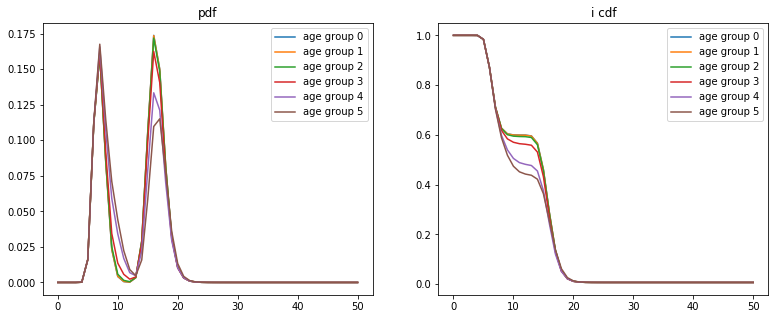

In [36]:
ag = 0
fig, axs  = plt.subplots(1,2,figsize = (13,5))
for ag in range(num_age_groups):
    axs[0].plot(times,tau_recovery[ag],label = f"age group {ag}")
    axs[1].plot(times,1-np.cumsum(tau_recovery[ag]),label = f"age group {ag}")
axs[0].legend()
axs[1].legend()
axs[0].set_title("pdf")
axs[1].set_title("i cdf")
fig.show()

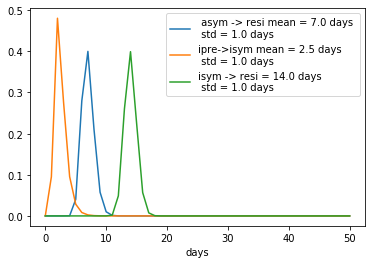

In [37]:
stats_check_asym_resi = lognorm.stats(std_asym_rec_logn,scale = np.exp(mu_asym_rec_logn), moments = 'mv')
stats_check_ipre_isym = lognorm.stats(std_ipre_isym_logn,scale = np.exp(mu_ipre_isym_logn), moments = 'mv')
stats_check_isym_resi = lognorm.stats(std_isym_resi_logn,scale = np.exp(mu_isym_resi_logn), moments = 'mv')
plt.plot(times, t_asym_rec,label = f" asym -> resi mean = {stats_check_asym_resi[0]:.1f} days \n std = {np.sqrt(stats_check_asym_resi[1]):.1f} days")
plt.plot(times, t_ipre_isym,label = f"ipre->isym mean = {stats_check_ipre_isym[0]:.1f} days \n std = {np.sqrt(stats_check_ipre_isym[1]):.1f} days")
plt.plot(times, t_isym_resi,label = f"isym -> resi = {stats_check_isym_resi[0]:.1f} days \n std = {np.sqrt(stats_check_isym_resi[1]):.1f} days")

plt.xlabel("days")
plt.legend()
plt.show()


In [134]:
def mylognormal(x,mu=0.0,std = 1.0): 
    return np.exp(-(np.log(x)-mu)**2/(2*std**2))/(x*std*np.sqrt(2*np.pi))

/opt/anaconda3/envs/bigdatalab_201911/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/opt/anaconda3/envs/bigdatalab_201911/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


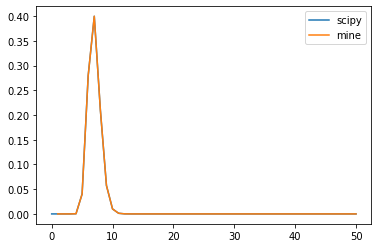

In [135]:
plt.plot(times,t_asym_rec,label = "scipy")
plt.plot(times,mylognormal(np.array(times),mu = mu_asym_rec_logn,std = std_asym_rec_logn),label = "mine")
plt.legend()

In [121]:
np.pi

3.141592653589793